In [1]:
# Importing required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from os import path
import os

# Importing necessary classes for data preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Importing functions for evaluating model performance
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Importing functions for data splitting and training models
from sklearn.model_selection import train_test_split

# Importing various machine learning algorithms
from sklearn.svm import SVC  # Support Vector Classifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

In [2]:
df = pd.read_csv("C:\\Users\\user\\Documents\\jupyter\\Enhanced IDS\\Dataset\\df_visualized.csv")

In [3]:
df.shape

(426331, 68)

In [4]:
df[' Label'].value_counts()

 Label
7     39850
11    39744
6     39417
10    39221
2     39064
3     38952
4     37786
1     37420
8     36529
9     35954
5     27447
0     14941
12        6
Name: count, dtype: int64

In [5]:
df.head(5)

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,17,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,1
2,17,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
3,17,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
4,17,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1


In [6]:
data_X = df.drop([' Label'], axis = 1)

In [7]:
data_y = df[' Label']

In [8]:
df.isnull().sum().sum()

0

In [9]:
data_y.unique()

array([ 1,  0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int64)

In [10]:
from sklearn.preprocessing import LabelEncoder 

In [11]:
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)
data_y_trans

array([ 1,  1,  1, ..., 11, 11, 11], dtype=int64)

In [12]:
data_X

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound
0,17,28415,97,0,42680.0,0.0,440.0,440.0,440.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,17,2,2,0,880.0,0.0,440.0,440.0,440.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,17,48549,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,17,48337,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,17,32026,200,0,88000.0,0.0,440.0,440.0,440.0,0.0,...,-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426326,17,1,2,0,802.0,0.0,401.0,401.0,401.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426327,17,2,2,0,750.0,0.0,375.0,375.0,375.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426328,17,2,2,0,750.0,0.0,375.0,375.0,375.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
426329,17,3,2,0,766.0,0.0,383.0,383.0,383.0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
data_X.dtypes

 Protocol                        int64
 Flow Duration                   int64
 Total Fwd Packets               int64
 Total Backward Packets          int64
Total Length of Fwd Packets    float64
                                ...   
Idle Mean                      float64
 Idle Std                      float64
 Idle Max                      float64
 Idle Min                      float64
 Inbound                         int64
Length: 67, dtype: object

In [14]:
from sklearn.feature_selection import chi2 
from sklearn.feature_selection import SelectKBest 
from sklearn.ensemble import ExtraTreesClassifier

#selecting 20 best features
# select_best= SelectKBest(chi2, k=20)
# X_feat_20 = select_best.fit_transform(data_X, data_y_trans)
# X_feat_20.shape

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [15]:
model.feature_importances_

array([2.34986657e-02, 1.99856538e-02, 1.50694355e-02, 5.35024793e-04,
       2.71574089e-02, 3.29728140e-04, 4.31866435e-02, 4.24222080e-02,
       6.03769890e-02, 6.98922480e-03, 1.21347238e-03, 8.38178268e-04,
       8.12773856e-04, 2.65668467e-04, 4.81121897e-02, 2.72615689e-02,
       1.13582535e-02, 9.13136610e-03, 1.05996518e-02, 1.20511039e-02,
       1.78834894e-02, 9.99089020e-03, 7.58107887e-03, 9.55680889e-03,
       1.12531295e-02, 5.89400398e-04, 4.40684089e-04, 3.36082179e-04,
       4.78542409e-04, 3.50102217e-04, 9.02344428e-04, 3.50530152e-02,
       1.13190851e-03, 2.91047787e-02, 9.74785648e-04, 5.24923235e-02,
       3.59093063e-02, 5.79576387e-02, 4.24009739e-03, 2.09878879e-03,
       7.57107023e-05, 7.14329191e-04, 4.76697461e-02, 6.72438192e-03,
       3.30141159e-03, 3.43629015e-03, 5.69593268e-02, 6.62050801e-02,
       1.11469226e-03, 3.56446821e-02, 1.33472655e-02, 2.90040073e-02,
       5.41994700e-04, 1.41139163e-04, 3.79256725e-03, 1.37172840e-03,
      

<Axes: title={'center': 'Standardised Dataset Feature Selection using ExtraTreesClassifier'}>

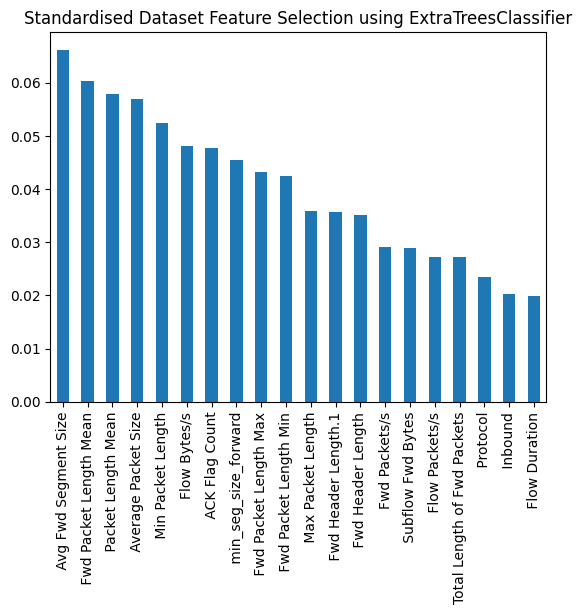

In [16]:
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

In [17]:
data_X.shape 

(426331, 67)

In [18]:
# Get the top 20 features based on feature importance
top_20_features = feature_importance_std.nlargest(20).index

# Select the corresponding columns from the original dataset
data_new_20features_X = data_X[top_20_features]

# Print the list of top 20 features
print("Top 20 Features:")
print(top_20_features)

Top 20 Features:
Index([' Avg Fwd Segment Size', ' Fwd Packet Length Mean',
       ' Packet Length Mean', ' Average Packet Size', ' Min Packet Length',
       'Flow Bytes/s', ' ACK Flag Count', ' min_seg_size_forward',
       ' Fwd Packet Length Max', ' Fwd Packet Length Min',
       ' Max Packet Length', ' Fwd Header Length.1', ' Fwd Header Length',
       'Fwd Packets/s', ' Subflow Fwd Bytes', ' Flow Packets/s',
       'Total Length of Fwd Packets', ' Protocol', ' Inbound',
       ' Flow Duration'],
      dtype='object')


In [19]:
data_new_20features_X

,Avg Fwd Segment Size,Fwd Packet Length Mean,Packet Length Mean,Average Packet Size,Min Packet Length,Flow Bytes/s,ACK Flag Count,min_seg_size_forward,Fwd Packet Length Max,Fwd Packet Length Min,Max Packet Length,Fwd Header Length.1,Fwd Header Length,Fwd Packets/s,Subflow Fwd Bytes,Flow Packets/s,Total Length of Fwd Packets,Protocol,Inbound,Flow Duration
0,440.0,440.0,440.0,444.536083,440.0,1.502024e+06,0,-1,440.0,440.0,440.0,-97.0,-97.0,3.413690e+03,42680,3.413690e+03,42680.0,17,1,28415
1,440.0,440.0,440.0,660.000000,440.0,4.400000e+08,0,-1,440.0,440.0,440.0,-2.0,-2.0,1.000000e+06,880,1.000000e+06,880.0,17,0,2
2,440.0,440.0,440.0,442.200000,440.0,1.812602e+06,0,-1,440.0,440.0,440.0,-200.0,-200.0,4.119549e+03,88000,4.119549e+03,88000.0,17,1,48549
3,440.0,440.0,440.0,442.200000,440.0,1.820552e+06,0,-1,440.0,440.0,440.0,-200.0,-200.0,4.137617e+03,88000,4.137617e+03,88000.0,17,1,48337
4,440.0,440.0,440.0,442.200000,440.0,2.747767e+06,0,-1,440.0,440.0,440.0,-200.0,-200.0,6.244926e+03,88000,6.244926e+03,88000.0,17,1,32026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426326,401.0,401.0,401.0,601.500000,401.0,8.020000e+08,0,0,401.0,401.0,401.0,0.0,0.0,2.000000e+06,802,2.000000e+06,802.0,17,1,1
426327,375.0,375.0,375.0,562.500000,375.0,3.750000e+08,0,0,375.0,375.0,375.0,0.0,0.0,1.000000e+06,750,1.000000e+06,750.0,17,1,2
426328,375.0,375.0,375.0,562.500000,375.0,3.750000e+08,0,0,375.0,375.0,375.0,0.0,0.0,1.000000e+06,750,1.000000e+06,750.0,17,1,2
426329,383.0,383.0,383.0,574.500000,383.0,2.553333e+08,0,0,383.0,383.0,383.0,0.0,0.0,6.666667e+05,766,6.666667e+05,766.0,17,1,3


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_new_20features_X, data_y_trans, test_size = 0.30, random_state = 42)

In [21]:
X_train.shape 

(298431, 20)

In [22]:
X_test.shape 

(127900, 20)

In [23]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

In [24]:
from sklearn.model_selection import train_test_split
X_train_20, X_test_20, y_train_20, y_test_20 = train_test_split(data_X, data_y_trans, test_size = 0.30, random_state = 42)

In [25]:
from sklearn.preprocessing import StandardScaler 
ss_20 = StandardScaler()
X_train_std_20 = ss_20.fit_transform(X_train_20)
X_test_std_20 = ss_20.fit_transform(X_test_20)

In [26]:
X_train_std_20.shape 

(298431, 67)

In [27]:
y_train_20.shape

(298431,)

In [28]:
X_test_std_20.shape 

(127900, 67)

In [29]:
y_test_20.shape 

(127900,)

In [30]:
y_test_20.shape 

(127900,)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train_std_20, y_train_20)


RandomForestClassifier()

In [32]:
rf_y_pred = rf.predict(X_test_std_20)

In [33]:
rf_y_pred

array([ 8,  3,  7, ...,  3, 10,  7], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 

In [35]:
print("Classification Report for Random Forest: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(rf_y_pred)))

C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for Random Forest: 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      4512
           1       0.47      0.35      0.40     11195
           2       0.38      0.60      0.47     11661
           3       0.28      0.24      0.25     11745
           4       0.23      0.07      0.11     11343
           5       0.85      0.93      0.89      8247
           6       1.00      0.99      1.00     11940
           7       0.46      0.73      0.57     11883
           8       0.54      0.92      0.68     10868
           9       0.73      0.22      0.34     10779
          10       0.49      0.86      0.62     11756
          11       0.80      0.04      0.07     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.55    127900
   macro avg       0.55      0.53      0.49    127900
weighted avg       0.57      0.55      0.50    127900



C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [36]:
rf_conf_mat = confusion_matrix(y_test_20, rf_y_pred)
print("Random Forest Confusion: \n", rf_conf_mat)

Random Forest Confusion: 
 [[ 4477     1     0     0     0    34     0     0     0     0     0     0
      0]
 [   31  3879  4347   107    18   536     5  2230     0     4    35     3
      0]
 [    3    88  7042    28     2     2     0  4496     0     0     0     0
      0]
 [    1  1210  4381  2776    88   257     0  2967     0     1    64     0
      0]
 [    0  2273   155  7078   845   457     0   374     0     0   144    17
      0]
 [   85   500     0     2     0  7638     0     2     2    15     3     0
      0]
 [    2    83     0     5     0     0 11847     0     0     1     1     1
      0]
 [    8   241  2424    52    15    34     1  8713     0     4   315    76
      0]
 [    0     0     0     0     0     0     0     0 10002   866     0     0
      0]
 [    2    11     0     0     0     0     0     0  8349  2417     0     0
      0]
 [    1    21     0     8  1538     0     0     3     0     0 10167    18
      0]
 [    0    34     0    28  1228     0     0     7     0     

In [37]:
acc_score = accuracy_score(y_test_20, rf_y_pred)
print("Accuracy Score for Random_Forest: \n", acc_score*100)

Accuracy Score for Random_Forest: 
 54.93666927286943


In [38]:
import joblib

# Save the trained model to a file
model_filename = "random_forest_model.pkl"
joblib.dump(rf, model_filename)

print("Random Forest model saved as:", model_filename)

Random Forest model saved as: random_forest_model.pkl


In [39]:
import lightgbm as lgb
lg = lgb.LGBMClassifier()
lg.fit(X_train_std_20, y_train_20)

lg_y_pred = lg.predict(X_test_std_20)

# Cell 9: Evaluate results
from sklearn.metrics import classification_report
print("Classification Report for LightGBM: \n", classification_report(le.inverse_transform(y_test_20), le.inverse_transform(lg_y_pred)))

[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.152244 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 13410
[LightGBM] [Info] Number of data points in the train set: 298431, number of used features: 67
[LightGBM] [Info] Start training from score -3.353948
[LightGBM] [Info] Start training from score -2.431826
[LightGBM] [Info] Start training from score -2.387886
[LightGBM] [Info] Start training from score -2.395064
[LightGBM] [Info] Start training from score -2.423547
[LightGBM] [Info] Start training from score -2.743628
[LightGBM] [Info] Start training from score -2.385189
[LightGBM] [Info] Start training from score -2.367514
[LightGBM] [Info] Start training from score -2.453566
[LightGBM] [Info] Start training from score -2.472687
[LightGBM] [Info] Start training from score -2.385626
[LightGBM] [Info] Start training from score -2.3

C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification Report for LightGBM: 
               precision    recall  f1-score   support

           0       0.29      0.36      0.32      4512
           1       0.37      0.01      0.02     11195
           2       0.00      0.00      0.00     11661
           3       0.00      0.00      0.00     11745
           4       0.16      0.83      0.27     11343
           5       0.64      0.02      0.03      8247
           6       0.06      0.00      0.00     11940
           7       0.01      0.00      0.00     11883
           8       0.26      0.83      0.40     10868
           9       0.97      0.09      0.17     10779
          10       0.13      0.07      0.10     11756
          11       0.00      0.00      0.00     11970
          12       0.00      0.00      0.00         1

    accuracy                           0.17    127900
   macro avg       0.22      0.17      0.10    127900
weighted avg       0.22      0.17      0.10    127900



C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\conda\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
